In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

###Loading the data

In [5]:
import zipfile

zip_path = "/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST/data.zip"
extract_path = "/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [14]:
TRAIN_DATA = "/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST/train"
VALID_DATA = "/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST/validation"

####See whats in the data

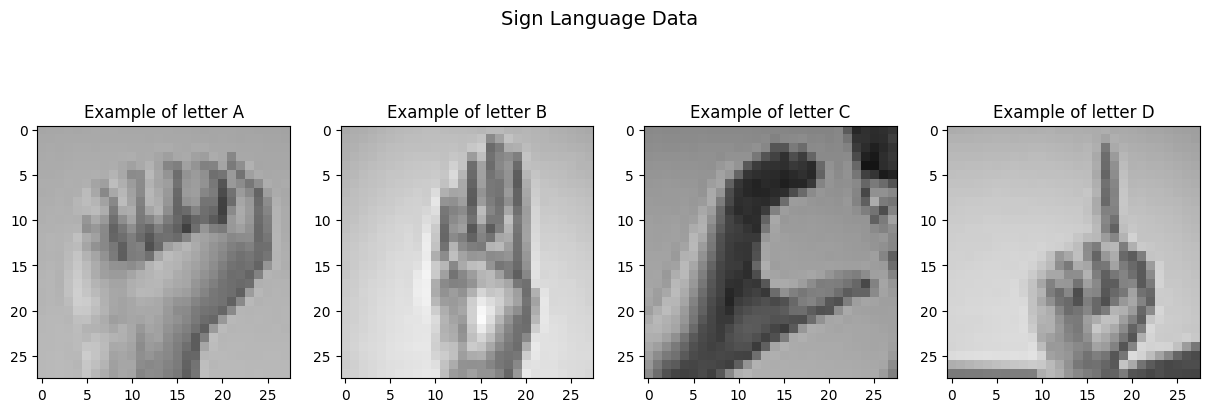

In [11]:
import random

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle("Sign Language Data", fontsize=14)

for ii, letter in enumerate(['A' , 'B', 'C', 'D']):
  dir = f"/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST/train/{letter}"

  images = os.listdir(dir)
  random_img = random.choice(images)

  img_path = os.path.join(dir, random_img)
  img = tf.keras.preprocessing.image.load_img(img_path)

  axes[ii].imshow(img)
  axes[ii].set_title(f'Example of letter {letter}')

plt.show()

In [12]:
img_np = tf.keras.preprocessing.image.img_to_array(img)
img_np.shape

(28, 28, 3)

###Creating the Train and Test Data

In [15]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = TRAIN_DATA,
    batch_size = 32,
    image_size = (28, 28),
    label_mode = "categorical",
    color_mode = "grayscale",
)

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = VALID_DATA,
    batch_size = 32,
    image_size = (28, 28),
    label_mode = "categorical",
    color_mode = "grayscale",
)

Found 27455 files belonging to 24 classes.
Found 7173 files belonging to 24 classes.


In [18]:
print("Train image shape: ", train_dataset.element_spec[0].shape)
print("Train label shape: ", train_dataset.element_spec[1].shape)
print("Valid image shape: ", valid_dataset.element_spec[0].shape)
print("Valid label shape: ", valid_dataset.element_spec[1].shape)

Train image shape:  (None, 28, 28, 1)
Train label shape:  (None, 24)
Valid image shape:  (None, 28, 28, 1)
Valid label shape:  (None, 24)
